## 결정트리 시각화하기
- graphviz모듈을 사용해 트리모델을 시각화할 수 있다.

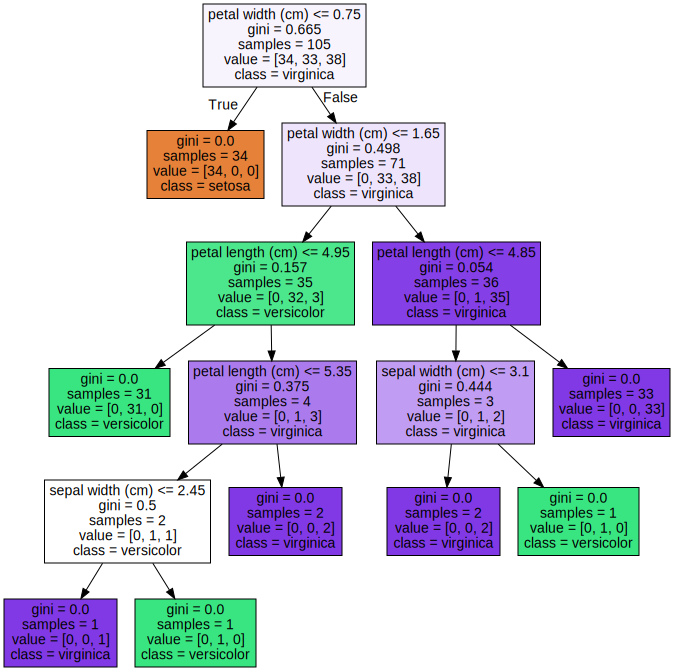

In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.tree import export_graphviz

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.3, random_state=1234)

model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

# graphviz 모듈은 dot라는 확장자를 사용하고 Source라는 모듈과 함께 그래프를 호출한다.
export_graphviz(model, out_file='tree.dot', class_names = iris['target_names'], feature_names = iris['feature_names'], impurity=True, filled=True )
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## 중요도 그리기

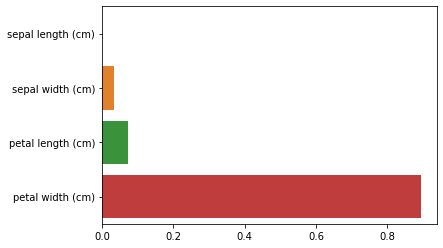

In [13]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# barplot을 활용해서 중요도를 그릴 수 있다.
sns.barplot(x = model.feature_importances_ , y = iris['feature_names'])
plt.show()

## 결정트리

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11704\2280995965.py:30: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


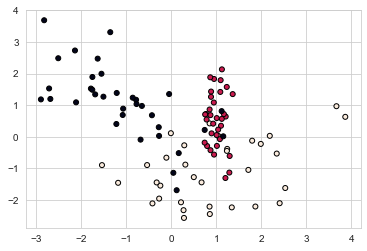

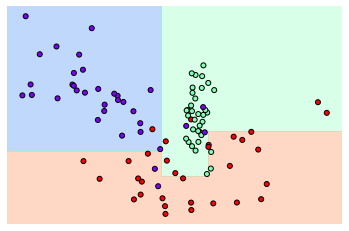

In [23]:
# 가짜 데이터 만들기. 피처 2개, 클래스-3
from sklearn.datasets import make_classification


X_data, y_target = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 작성 - 산포도
sns.set_style('whitegrid')
plt.scatter(X_data[:, 0], X_data[:, 1], marker='o', c = y_target, s = 25, edgecolors='k')

def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

tree = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_data, y_target)
visualize_boundary(tree, X_data, y_target)
